In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [5]:
name_mapper = {'SVR': 'SVM', 
               'RandomForestRegressor': 'RF', 
               'AdaBoostRegressor': 'AdaBoost', 
               'GradientBoostingRegressor': 'GradientBoosting', 
               'BaggingRegressor': 'Bagging',
               'Euclidean Distance': 'Euclidean',
               'Pearson Correlation': 'Pearson',
               'Jaccard Index': 'Jaccard'
              }

In [6]:
styles = {'SVM': ['red', 'o', (0, (1, 1))], 'BayesianRidge': ['green', 'v', (0, (1, 1))], 
          'Lasso': ['blue', 'p', (0, (1, 1))], 'Ridge': ['cyan', 's', (0, (5, 10))], 
          'Bagging': ['orange', 'D', (0, (5, 5))], 'AdaBoost': ['violet', 'x', (0, (5, 1))], 
          'RF': ['magenta', 'd', (0, (3, 10, 1, 10))], 'GradientBoosting': ['olive', '8', (0, (3, 5, 1, 5))], 
          'Euclidean Distance (user-based)': ['yellow', 'H', (0, (3, 1, 1, 1))], 
          'Euclidean Distance (item-based)': ['black', '<', (0, (3, 5, 1, 5, 1, 5))], 
          'Pearson Correlation (user-based)': ['gray', '>', (0, (3, 10, 1, 10, 1, 10))], 
          'Pearson Correlation (item-based)': ['teal', '^', (0, (3, 1, 1, 1, 1, 1))], 
          'Jaccard Index (user-based)': ['lawngreen', 'P', 'solid'], 
          'Jaccard Index (item-based)': ['deeppink', '*', 'dashdot']}

### Baseline:

In [8]:
with open('../results/baseline_regression_results.json') as fr:
    baseline_reg = json.load(fr)    

In [9]:
with open('../results/baseline_collaborative_filtering_results (user-based).json') as fr:
    baseline_cb_user = json.load(fr)    

In [10]:
with open('../results/baseline_collaborative_filtering_results (item-based).json') as fr:
    baseline_cb_item = json.load(fr)    

In [5]:
def plot_baseline(reg, cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(5.5, 5.89286), sharex=True)
    
    for model in baseline_reg:
        error = {'rmse': [], 'mae': []}
        for n_training_sem in sorted(baseline_reg[model]):
            error['rmse'].append(baseline_reg[model][n_training_sem]['rmse'][1])
            error['mae'].append(baseline_reg[model][n_training_sem]['mae'][1])
        
        if model in name_mapper:
            model = name_mapper[model]
        
        axs[0].plot(np.arange(7), error['rmse'], label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=1, ms=3, color=styles[model][0])
        axs[1].plot(np.arange(7), error['mae'], label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=1, ms=3, color=styles[model][0])
    
    for model in cb_user:
        if model in name_mapper:
            model_legend = name_mapper[model] + 'User'
        
        model_label = model + ' (user-based)'
        axs[0].plot(np.arange(7), cb_user[model]['rmse'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
        axs[1].plot(np.arange(7), cb_user[model]['mae'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
    
    for model in cb_item:
        if model in name_mapper:
            model_legend = name_mapper[model] + 'Item'
        
        model_label = model + ' (item-based)'
        axs[0].plot(np.arange(7), cb_item[model]['rmse'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
        axs[1].plot(np.arange(7), cb_item[model]['mae'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
    
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=11)
    axs[1].set_xlabel('Number of Training Semesters', fontfamily='serif', fontsize=11)

    axs[0].set_yticks(np.arange(0.8, 2.5, 0.1))
    axs[1].set_yticks(np.arange(0.5, 2.1, 0.1))
    axs[0].set_yticklabels([round(i,1) for i in np.arange(0.8, 2.5, 0.1)], fontfamily='serif', fontsize=11)
    axs[1].set_yticklabels([round(i,1) for i in np.arange(0.5, 2.1, 0.1)], fontfamily='serif', fontsize=11)
    axs[1].set_xticks(np.arange(7))
    axs[1].set_xticklabels(['N={}'.format(i+1) for i in range(7)], fontsize=11, fontfamily='serif')
    
    axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[0].tick_params(axis = "y", which = "both", left = False, right = False)
    axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[1].tick_params(axis = "y", which = "both", left = False, right = False)
    plt.subplots_adjust(hspace=.05)
    axs[1].legend(prop={'size': 10, 'family': 'serif'}, loc='right', bbox_to_anchor=(1.44, 1), ncol=1)
    right_side = axs[0].spines["right"]
    right_side.set_visible(False)
    left_side = axs[0].spines["left"]
    left_side.set_visible(False)
    top_side = axs[0].spines["top"]
    top_side.set_visible(False)
    right_side = axs[1].spines["right"]
    right_side.set_visible(False)
    left_side = axs[1].spines["left"]
    left_side.set_visible(False)
    top_side = axs[1].spines["top"]
    top_side.set_visible(False)
    axs[0].grid(axis='y')
    axs[1].grid(axis='y')

    plt.savefig('error_baseline.eps', bbox_inches='tight', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


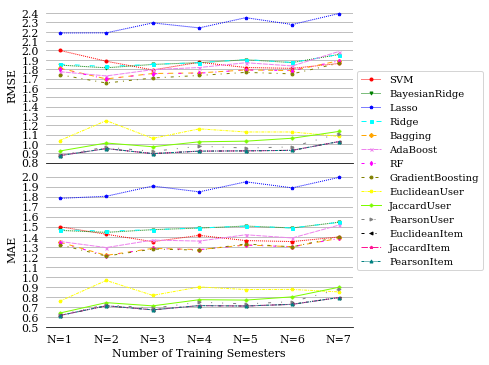

In [8]:
plot_baseline(baseline_reg, baseline_cb_user, baseline_cb_item)

### Student-based Clustering:

In [6]:
with open('../results/regression_eski.json') as fr:
    regression_eski = json.load(fr)   

In [4]:
with open('../results/student_base_clustering_and_itembased_collaborative_filtering.json') as fr:
    student_cluster_cb_item = json.load(fr)

In [5]:
with open('../results/student_base_clustering_and_userbased_collaborative_filtering.json') as fr:
    student_cluster_cb_user = json.load(fr)

In [12]:
# bizim fonksiyon 
def plot_student_based_clustering(cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(5.5, 5.89286), sharex=True)

     
    semesters_to_use = ["1","2","3","4","5","6"] # from term 2 to term 7
    num_cluster = "30" # 30 falan da denenebilir 

    # user-based
    for model in cb_user: # 3 farkli model var, euclidean, jaccard, pearson 
        # print(model)

        if (model == "Pearson Correlation"): # sadece pearson correlation icin yaptim simdilik 
            rmse_per_semester = []
            mae_per_semester = []

            for n_training_sem in cb_user[model][num_cluster]:

                y_true = cb_user[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_user[model][num_cluster][n_training_sem]['y_pred']

                # print("forun icinde ") # 18 kez calisiyor, her model icin 6 defa

                # Convert strings to floats
                y_true = np.array(y_true, dtype=np.float64)
                y_pred = np.array(y_pred, dtype=np.float64)

                # Compute metrics
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)

                # print(f"user-based: \n training sem: {int(n_training_sem)+1} rmse: {rmse} , mae: {mae}")

                rmse_per_semester.append(rmse)
                mae_per_semester.append(mae)
        
            # Prepare labels
            model_label = model + ' (user-based)'
            model_legend = name_mapper[model] + 'User'

            # Plot results
            axs[0].plot(range(len(rmse_per_semester)), rmse_per_semester, label=model_legend,
                        linestyle=styles[model_label][2], marker=styles[model_label][1],
                        linewidth=1, ms=3, color=styles[model_label][0])
            
            axs[1].plot(range(len(mae_per_semester)), mae_per_semester, label=model_legend,
                        linestyle=styles[model_label][2], marker=styles[model_label][1],
                        linewidth=1, ms=3, color=styles[model_label][0])


    
    # item-based 
    for model in cb_item: # 3 farkli model var, euclidean, jaccard, pearson 

        if (model == "Pearson Correlation"):
            rmse_per_semester = []
            mae_per_semester = []

            for n_training_sem in cb_item[model][num_cluster]:

                y_true = cb_item[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_item[model][num_cluster][n_training_sem]['y_pred']

                # print("forun icinde ") # 18 kez calisiyor, her model icin 6 defa

                # Convert strings to floats
                y_true = np.array(y_true, dtype=np.float64)
                y_pred = np.array(y_pred, dtype=np.float64)

                # Compute metrics
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)

                # print(f"item-based: \n training sem: {int(n_training_sem)+1} rmse: {rmse} , mae: {mae}")

                rmse_per_semester.append(rmse)
                mae_per_semester.append(mae)



            # printing 6 values for pearson correlation model and item-based part: 
            a = 1
            sum = 0 
            
            print("weighed_average_rmse:")
            for i in rmse_per_semester:
                a += 1
                if (a == 2):
                    sum += 9 * i
                if (a == 3):
                    sum += 8 * i
                if (a == 4):
                    sum += 7 * i
                if (a == 5):
                    sum += 6 * i
                if (a == 6):
                    sum += 8 * i
                if (a == 7):
                    sum += 4 * i
                # print(f"{i:.4f}")

            weighted_average_rmse = sum / 42
            print(weighted_average_rmse)

            a = 1
            sum = 0 
            print("weighted_average_mae:")
            for i in mae_per_semester:
                a += 1
                if (a == 2):
                    sum += 9 * i
                if (a == 3):
                    sum += 8 * i
                if (a == 4):
                    sum += 7 * i
                if (a == 5):
                    sum += 6 * i
                if (a == 6):
                    sum += 8 * i
                if (a == 7):
                    sum += 4 * i
                # print(f"{i:.4f}")

            weighted_average_mae = sum / 42
            print(weighted_average_mae)

            # Prepare labels
            model_label = model + ' (item-based)'
            model_legend = name_mapper[model] + 'Item'

            # Plot results
            axs[0].plot(range(len(rmse_per_semester)), rmse_per_semester, label=model_legend,
                        linestyle=styles[model_label][2], marker=styles[model_label][1],
                        linewidth=1, ms=3, color=styles[model_label][0])
            
            axs[1].plot(range(len(mae_per_semester)), mae_per_semester, label=model_legend,
                        linestyle=styles[model_label][2], marker=styles[model_label][1],
                        linewidth=1, ms=3, color=styles[model_label][0])
    


    # adjust plotting 
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=11)
    axs[1].set_xlabel('Term by term', fontfamily='serif', fontsize=11)

    axs[0].set_yticks(np.arange(0.0, 1.05, 0.1))
    axs[1].set_yticks(np.arange(0.0, 1.05, 0.1))
    axs[0].set_yticklabels([round(i, 1) for i in np.arange(0.0, 1.05, 0.1)], fontfamily='serif', fontsize=11)
    axs[1].set_yticklabels([round(i, 1) for i in np.arange(0.0, 1.05, 0.1)], fontfamily='serif', fontsize=11)
    
    
    axs[1].set_xticks(np.arange(6))
    axs[1].set_xticklabels(['Term-{}'.format(i) for i in range(2, 8)], fontsize=11, fontfamily='serif')        

    axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[0].tick_params(axis = "y", which = "both", left = False, right = False)
    axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[1].tick_params(axis = "y", which = "both", left = False, right = False)
    plt.subplots_adjust(hspace=.05)
    axs[1].legend(prop={'size': 10, 'family': 'serif'}, loc='right', bbox_to_anchor=(1.44, 1), ncol=1)
    right_side = axs[0].spines["right"]
    right_side.set_visible(False)
    left_side = axs[0].spines["left"]
    left_side.set_visible(False)
    top_side = axs[0].spines["top"]
    top_side.set_visible(False)
    right_side = axs[1].spines["right"]
    right_side.set_visible(False)
    left_side = axs[1].spines["left"]
    left_side.set_visible(False)
    top_side = axs[1].spines["top"]
    top_side.set_visible(False)
    axs[0].grid(axis='y')
    axs[1].grid(axis='y')

    plt.savefig('error_cluster_student.eps', bbox_inches='tight', dpi=1200)

In [4]:
import json
# Your results
results = {
    "chinese cf": {
        "WeightedAvgRMSE": 0.9169478210201234,
        "WeightedAvgMAE": 0.7536883463242658
    },
}

# Save to JSON file
with open("chinese_cf.json", "w") as f:
    json.dump(results, f, indent=4)

weighed_average_rmse:
0.9169478210201234
weighted_average_mae:
0.7536883463242658


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


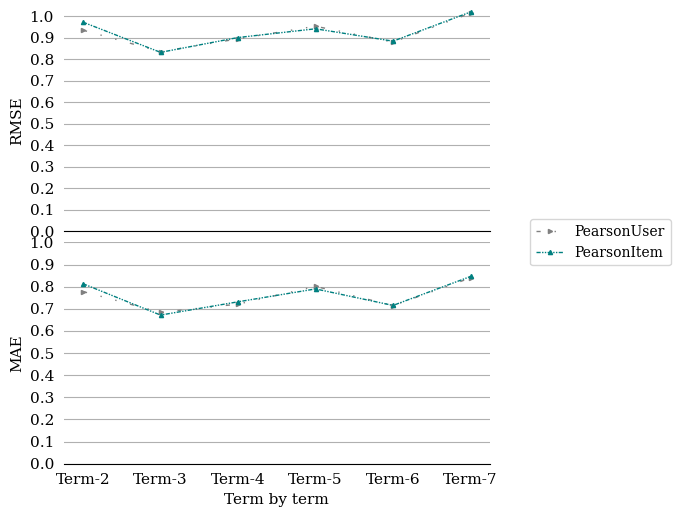

In [13]:
plot_student_based_clustering(student_cluster_cb_user, student_cluster_cb_item)

### Course-based Clustering:

In [14]:
with open('../results/clustering_course_based_regression_results (with KMeans).json') as fr:
    course_cluster_reg = json.load(fr)    

In [15]:
with open('../results/clustering_user_based_collaborative_filtering_results (Course based with KMeans).json') as fr:
    course_cluster_cb_user = json.load(fr)    

In [16]:
with open('../results/clustering_item_based_collaborative_filtering_results (Course based with KMeans).json') as fr:
    course_cluster_cb_item = json.load(fr)    

In [20]:
def plot_course_based_clustering(reg, cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(5.5, 5.89286), sharex=True)
    
    for model in reg:
        best_score = {}
        for num_cluster in reg[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in reg[model][num_cluster]:
                y_true = reg[model][num_cluster][n_training_sem]['y_true']
                y_pred = reg[model][num_cluster][n_training_sem]['y_pred']
                
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                
                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
         
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        if model in name_mapper:
            model = name_mapper[model]
        
        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=1, ms=3, color=styles[model][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=1, ms=3, color=styles[model][0])
            
    for model in cb_user:
        best_score = {}
        for num_cluster in cb_user[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in cb_user[model][num_cluster]:
                y_true = cb_user[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_user[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                
                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
                        
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        model_label = model + ' (user-based)'
        if model in name_mapper:
            model_legend = name_mapper[model] + 'User'        
        
        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
        
    for model in cb_item:
        best_score = {}
        for num_cluster in cb_item[model]:
            best_score.setdefault(num_cluster, {'rmse': 100, 'mae': 100})
            for n_training_sem in cb_item[model][num_cluster]:
                y_true = cb_item[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_item[model][num_cluster][n_training_sem]['y_pred']
                
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)

                if rmse < best_score[num_cluster]['rmse']:
                    best_score[num_cluster]['rmse'] = rmse
                elif mae < best_score[num_cluster]['mae']:
                    best_score[num_cluster]['mae'] = mae
                        
        best_rmse = {k:v['rmse'] for k,v in sorted(best_score.items())}
        best_mae = {k:v['mae'] for k,v in sorted(best_score.items())}
        
        model_label = model + ' (item-based)'
        if model in name_mapper:
            model_legend = name_mapper[model] + 'Item'        
        
        axs[0].plot(np.arange(5), list(best_rmse.values()), label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
        axs[1].plot(np.arange(5), list(best_mae.values()), label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
    
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=11)
    axs[1].set_xlabel('Number of Clusters (k)', fontfamily='serif', fontsize=11)

    axs[0].set_yticks(np.arange(0.8, 3.2, 0.2))
    axs[1].set_yticks(np.arange(0.6, 3.6, 0.2))
    axs[0].set_yticklabels([round(i,2) for i in np.arange(0.8, 3.2, 0.2)], fontfamily='serif', fontsize=11)
    axs[1].set_yticklabels([round(i,2) for i in np.arange(0.6, 3.6, 0.2)], fontfamily='serif', fontsize=11)
    
    axs[1].set_xticks(np.arange(5))
    axs[1].set_xticklabels(['k={}'.format(i) for i in range(10,31,5)], fontsize=11, fontfamily='serif')        
        
    axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[0].tick_params(axis = "y", which = "both", left = False, right = False)
    axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[1].tick_params(axis = "y", which = "both", left = False, right = False)
    plt.subplots_adjust(hspace=.05)
    axs[1].legend(prop={'size': 10, 'family': 'serif'}, loc='right', bbox_to_anchor=(1.44, 1), ncol=1)
    right_side = axs[0].spines["right"]
    right_side.set_visible(False)
    left_side = axs[0].spines["left"]
    left_side.set_visible(False)
    top_side = axs[0].spines["top"]
    top_side.set_visible(False)
    right_side = axs[1].spines["right"]
    right_side.set_visible(False)
    left_side = axs[1].spines["left"]
    left_side.set_visible(False)
    top_side = axs[1].spines["top"]
    top_side.set_visible(False)
    axs[0].grid(axis='y')
    axs[1].grid(axis='y')
    plt.savefig('error_cluster_course.eps', bbox_inches='tight', dpi=1200)

In [21]:
plot_course_based_clustering(course_cluster_reg, course_cluster_cb_user, course_cluster_cb_item)

NameError: name 'course_cluster_reg' is not defined

### Comparison with the state of the art

In [73]:
with open('../results/nn_results.json') as fr:
    nn = json.load(fr)    

In [74]:
with open('../results/naive_bayes_results.json') as fr:
    nb = json.load(fr)    

In [75]:
with open('../results/2017 paper.json') as fr:
    cb_2017 = json.load(fr)    

In [76]:
def plot_state_of_the_art(nn, nb, cb_2017):
    min_rmse = {}
    mapper = {'GaussianNB': 'GNB', 'MultinomialNB': 'MNB', 'NN': 'NN'}
    
    paper_2017 = np.min(cb_2017['Euclidean Distance']['rmse'])
    min_rmse['CB - Cakmak (2017)'] = paper_2017
    min_rmse['CF - Ibrahimzada & Cakmak (2020)'] = 0.633074917194508
    min_rmse['CF - Ahmed & Yavuz & Cakmak (2025)'] = 0.8326
    
    nb.update(nn)
    for model in nb:
        model_name = mapper[model] + ' - Mimis et al. (2018)'
        min_rmse.setdefault(model_name, 100)
        for n_training_semesters in nb[model]:
            if nb[model][n_training_semesters]['rmse'][1] < min_rmse[model_name]:
                min_rmse[model_name] = nb[model][n_training_semesters]['rmse'][1]
    
    x = np.arange(6)
    min_rmse = {k: v for k, v in sorted(min_rmse.items(), key=lambda item: item[1])}
    model_names = list(min_rmse.keys())
    fig, ax = plt.subplots(figsize=(8, 2.4))
    
    hatches = ['////', '\\\\\\\\', 'xx', '--', '||']
    for i in range(len(model_names)):
        ax.bar(i, min_rmse[model_names[i]], 0.8, label=model_names[i], hatch=hatches[i], color='white')
    
    for i, v in enumerate(min_rmse.values()):
        ax.text(i-0.14, v + 0.1, str(round(v, 2)), fontfamily='serif', fontsize=11, fontweight='bold')
    
    ax.set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    ax.set_yticks(range(8))
    ax.set_yticklabels([i for i in range(8)], fontfamily='serif', fontsize=11)
    ax.legend(prop={'size': 8, 'family': 'serif'})
    ax.grid(axis='y')
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    left_side = ax.spines["left"]
    left_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)     
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    ax.tick_params(axis = "y", which = "both", left = False, right = False)        
    plt.savefig('state of the art.eps', bbox_inches='tight', dpi=1200)

In [7]:
with open('../results/chinese_2017paper.json') as fr:
    cb_2017 = json.load(fr)  

In [8]:
with open('../results/chinese_cf.json') as fr:
    cf = json.load(fr)  

In [9]:
with open('../results/chinese_educationalgraph.json') as fr:
    eg = json.load(fr)  

In [10]:
with open('../results/chinese_gnb.json') as fr:
    gnb = json.load(fr) 

In [11]:
with open('../results/chinese_mnb.json') as fr:
    mnb = json.load(fr) 

In [12]:
with open('../results/chinese_nn.json') as fr:
    nn = json.load(fr) 

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot(cb_2017, cf, eg, gnb, mnb, nn):
    # Raw Data
    labels = [
        "CF - Ibrahimzada et al. (2025)",
        "CB - Cakmak (2017)",
        "EG - Zhang (2024)",
        "GNB - Mimis et al. (2018)",
        "MNB - Mimis et al. (2018)",
        "NN - Mimis et al. (2018)"
    ]
    rmse_values = [
        cf["chinese cf"]["WeightedAvgRMSE"],
        cb_2017["chinese 2017 paper"]["WeightedAvgRMSE"],
        eg["chinese educationalgraph"]["WeightedAvgRMSE"],
        gnb["chinese_gnb"]["WeightedAvgRMSE"],
        mnb["chinese_mnb"]["WeightedAvgRMSE"],
        nn["chinese_nn"]["WeightedAvgRMSE"]
    ]
    mae_values = [
        cf["chinese cf"]["WeightedAvgMAE"],
        cb_2017["chinese 2017 paper"]["WeightedAvgMAE"],
        eg["chinese educationalgraph"]["WeightedAvgMAE"],
        gnb["chinese_gnb"]["WeightedAvgMAE"],
        mnb["chinese_mnb"]["WeightedAvgMAE"],
        nn["chinese_nn"]["WeightedAvgMAE"]
    ]
    hatches = ['//', 'xx', '', '..', 'oo', '\\\\']
    original_colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

    # --- RMSE Plot ---
    rmse_data = sorted(zip(rmse_values, labels, hatches, original_colors), key=lambda x: x[0])
    rmse_values_sorted, labels_sorted, hatches_sorted, colors_sorted = zip(*rmse_data)

    x = np.arange(len(labels_sorted))
    edgecolors = ['black'] * len(labels_sorted)

    fig_rmse, ax_rmse = plt.subplots(figsize=(12, 5))
    for i in range(len(labels_sorted)):
        ax_rmse.bar(x[i], rmse_values_sorted[i],
                    color=colors_sorted[i],
                    edgecolor=edgecolors[i],
                    hatch=hatches_sorted[i],
                    linewidth=1.5,
                    width=0.5)
        ax_rmse.text(x[i], rmse_values_sorted[i] + 0.05, f"{rmse_values_sorted[i]:.5f}",
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax_rmse.set_title("Weighted Avg RMSE (Lower is Better)", fontsize=13, fontweight='bold', pad=15)
    ax_rmse.set_ylabel("RMSE", fontsize=11)
    ax_rmse.set_ylim(0, max(rmse_values_sorted) + 1)
    ax_rmse.set_xticks(x)
    ax_rmse.set_xticklabels(labels_sorted, rotation=30, ha='right')
    ax_rmse.yaxis.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

    # --- MAE Plot ---
    mae_data = sorted(zip(mae_values, labels, hatches, original_colors), key=lambda x: x[0])
    mae_values_sorted, labels_sorted_mae, hatches_sorted_mae, colors_sorted_mae = zip(*mae_data)

    x = np.arange(len(labels_sorted_mae))

    fig_mae, ax_mae = plt.subplots(figsize=(12, 5))
    for i in range(len(labels_sorted_mae)):
        ax_mae.bar(x[i], mae_values_sorted[i],
                   color=colors_sorted_mae[i],
                   edgecolor=edgecolors[i],
                   hatch=hatches_sorted_mae[i],
                   linewidth=1.5,
                   width=0.5)
        ax_mae.text(x[i], mae_values_sorted[i] + 0.05, f"{mae_values_sorted[i]:.5f}",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax_mae.set_title("Weighted Avg MAE (Lower is Better)", fontsize=13, fontweight='bold', pad=15)
    ax_mae.set_ylabel("MAE", fontsize=11)
    ax_mae.set_ylim(0, max(mae_values_sorted) + 1)
    ax_mae.set_xticks(x)
    ax_mae.set_xticklabels(labels_sorted_mae, rotation=30, ha='right')
    ax_mae.yaxis.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()


In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rmse(cb_2017, cf, eg, gnb, mnb, nn):
    # Raw Data
    labels = [
        "CF - Ibrahimzada\n et al. (2025)",
        "CB - Cakmak (2017)",
        "EG - Zhang (2024)",
        "GNB - Mimis\n et al. (2018)",
        "MNB - Mimis\n et al. (2018)",
        "NN - Mimis\n et al. (2018)"
    ]
    rmse_values = [
        cf["chinese cf"]["WeightedAvgRMSE"],
        cb_2017["chinese 2017 paper"]["WeightedAvgRMSE"],
        eg["chinese educationalgraph"]["WeightedAvgRMSE"],
        gnb["chinese_gnb"]["WeightedAvgRMSE"],
        mnb["chinese_mnb"]["WeightedAvgRMSE"],
        nn["chinese_nn"]["WeightedAvgRMSE"]
    ]

    # Define colors (you can modify if needed)
    original_colors = ['#4C72B0', '#55A868', '#79cdcd', '#F1C40F', '#F39C12', '#E74C3C']

    # Sort by RMSE
    rmse_data = sorted(zip(rmse_values, labels, original_colors), key=lambda x: x[0])
    rmse_values_sorted, labels_sorted, colors_sorted = zip(*rmse_data)

    x = np.arange(len(labels_sorted))

    # Plot RMSE
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(x, rmse_values_sorted, color=colors_sorted, width=0.6)

    for i, val in enumerate(rmse_values_sorted):
        ax.text(x[i], val + 0.1, f"{val:.2f}".replace(',', '.'), 
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

    ax.set_ylabel("Weighted RMSE", fontsize=12)
    ax.set_ylim(0, max(rmse_values_sorted))
    ax.set_xticks(x)
    ax.set_xticklabels(labels_sorted, rotation=0, ha='center', fontsize=10)
    ax.set_yticks(np.arange(0, max(rmse_values_sorted) + 1, 1))
    # ax.set_title("Comparing our proposed model with other state-of-the-art approaches", fontsize=13, pad=15, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig("fig12_rmse.eps", format="eps", bbox_inches='tight')  
    plt.show()


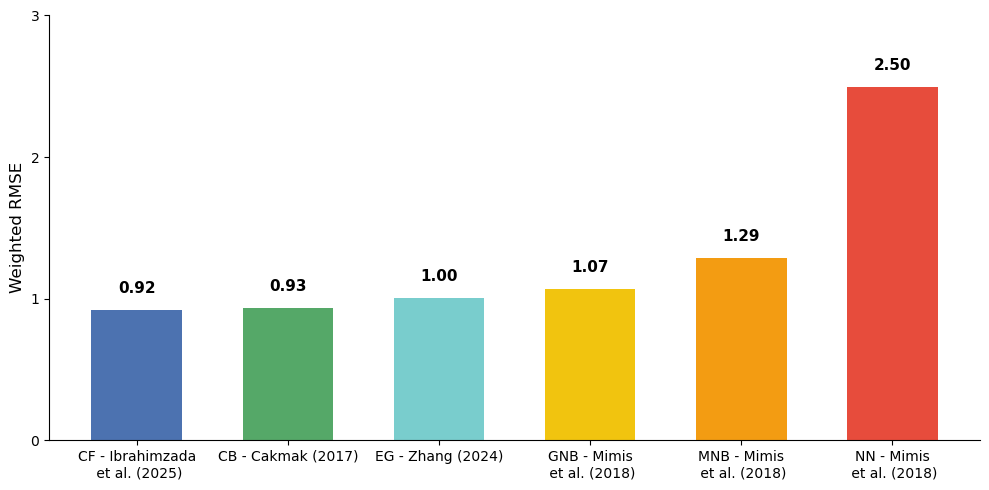

In [26]:
plot_rmse(cb_2017, cf, eg, gnb, mnb, nn)

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mae(cb_2017, cf, eg, gnb, mnb, nn):
    # Raw Data
    labels = [
        "CF - Ibrahimzada\n et al. (2025)",
        "EG - Zhang (2024)",
        "GNB - Mimis\n et al. (2018)",
        "CB - Cakmak (2017)",
        "MNB - Mimis\n et al. (2018)",
        "NN - Mimis\n et al. (2018)"
    ]
    mae_values = [
        cf["chinese cf"]["WeightedAvgMAE"],
        eg["chinese educationalgraph"]["WeightedAvgMAE"],
        gnb["chinese_gnb"]["WeightedAvgMAE"],
        cb_2017["chinese 2017 paper"]["WeightedAvgMAE"],
        mnb["chinese_mnb"]["WeightedAvgMAE"],
        nn["chinese_nn"]["WeightedAvgMAE"]
    ]

    # Define colors (you can modify if needed)
    original_colors = ['#4C72B0', '#79cdcd', '#F1C40F', '#55A868', '#F39C12', '#E74C3C']

    # Sort by Mae
    # mae_data = sorted(zip(mae_values, labels, original_colors), key=lambda x: x[0])
    # mae_values_sorted, labels_sorted, colors_sorted = zip(*mae_data)

    x = np.arange(len(labels))

    # Plot Mae
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(x, mae_values, color=original_colors, width=0.6)

    for i, val in enumerate(mae_values):
        ax.text(x[i], val + 0.1, f"{val:.2f}".replace(',', '.'), 
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

    ax.set_ylabel("Weighted MAE", fontsize=12)
    ax.set_ylim(0, max(mae_values))
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=10)
    ax.set_yticks(np.arange(0, max(mae_values) + 1, 1))
    # ax.set_title("Comparing our proposed model with other state-of-the-art approaches", fontsize=13, pad=15, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig("fig13_mae.eps", format="eps", bbox_inches='tight')
    plt.show()


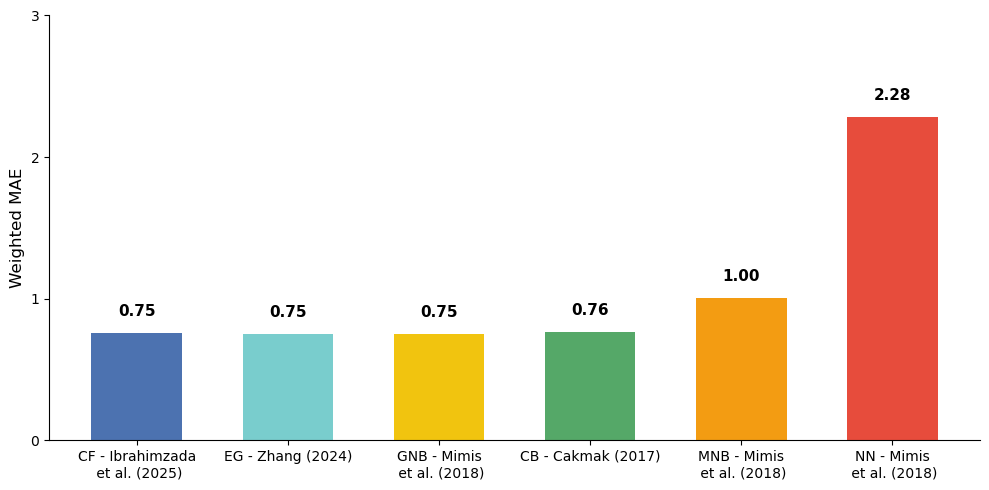

In [34]:
plot_mae(cb_2017, cf, eg, gnb, mnb, nn)


In [93]:
def plot_state_of_the_art(nn, nb, cb_2017):
    # Dictionary to store minimum RMSE values for each method
    min_rmse = {}
    mapper = {'GaussianNB': 'GNB', 'MultinomialNB': 'MNB', 'NN': 'NN'}
    
    # Add results from papers
    paper_2017 = np.min(cb_2017['Euclidean Distance']['rmse'])
    min_rmse['CB - Cakmak (2017)'] = paper_2017
    min_rmse['CF - Ibrahimzada & Cakmak (2020)'] = 0.633074917194508
    min_rmse['CF - Ahmed & Yavuz & Cakmak (2025)'] = 0.8326
    min_rmse['CF - Educational Graph (2024)'] = 0.8929
    
    # Process NB and NN results
    nb.update(nn)
    for model in nb:
        model_name = mapper[model] + ' - Mimis et al. (2018)'
        min_rmse.setdefault(model_name, 100)
        for n_training_semesters in nb[model]:
            if nb[model][n_training_semesters]['rmse'][1] < min_rmse[model_name]:
                min_rmse[model_name] = nb[model][n_training_semesters]['rmse'][1]
    
    # Sort results by RMSE value (ascending)
    min_rmse = {k: v for k, v in sorted(min_rmse.items(), key=lambda item: item[1])}
    model_names = list(min_rmse.keys())
    
    # Create figure with improved size for better readability
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Use distinctive hatches and add a light color tint for better visibility
    hatches = ['////', '\\\\\\\\', 'xx', '--', '||']
    colors = ['#f2f2f2', '#e6f2ff', '#fff2e6', '#f2e6ff', '#e6fff2']
    
    # Create bars with both hatches and light colors
    for i in range(len(model_names)):
        ax.bar(i, min_rmse[model_names[i]], 0.8, 
               label=model_names[i], 
               hatch=hatches[i % len(hatches)], 
               color=colors[i % len(colors)],
               edgecolor='black')
    
    # Add value labels above each bar with improved positioning
    for i, v in enumerate(min_rmse.values()):
        ax.text(i, v + 0.05, str(round(v, 2)), 
                fontfamily='serif', fontsize=12, fontweight='bold',
                ha='center')
    
    # Improve y-axis appearance
    ax.set_ylabel('RMSE', fontfamily='serif', fontsize=12, fontweight='bold')
    
    # Set y-axis to accommodate all values with some headroom
    max_value = max(min_rmse.values())
    y_max = max(3, math.ceil(max_value + 0.5))
    ax.set_ylim(0, y_max)
    
    # Add y-tick labels with appropriate spacing
    y_ticks = np.linspace(0, y_max, y_max+1)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([str(int(i)) if i == int(i) else f"{i:.1f}" for i in y_ticks], 
                       fontfamily='serif', fontsize=11)
    
    # Add model names on x-axis with angled text for better readability
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45, ha='right', fontfamily='serif', fontsize=10)
    
    # Improve legend position and appearance
    # ax.legend(loc='upper right', prop={'size': 9, 'family': 'serif'}, frameon=True, framealpha=0.7)
    
    # Add grid for easier value comparison and improve its appearance
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Clean up spines for a professional look
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
    
    # Add a title
    plt.title("Comparison of State-of-the-Art Methods (Lower RMSE is Better)", 
              fontfamily='serif', fontsize=14, fontweight='bold', pad=20)
    
    # Add tight layout and save with high resolution
    plt.tight_layout()
    plt.savefig('state_of_the_art.png', bbox_inches='tight', dpi=300)
    plt.savefig('state_of_the_art.eps', bbox_inches='tight', dpi=1200)
    
    print("Plot saved as 'state_of_the_art.png' and 'state_of_the_art.eps'")
    
    return fig

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plot saved as 'state_of_the_art.png' and 'state_of_the_art.eps'


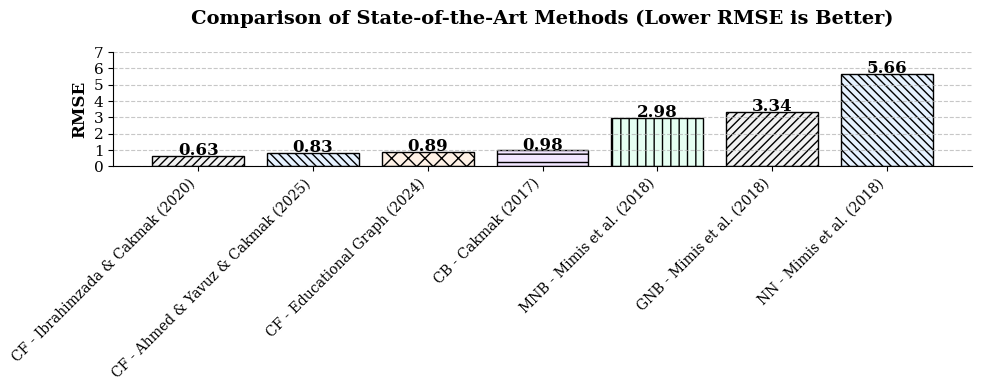

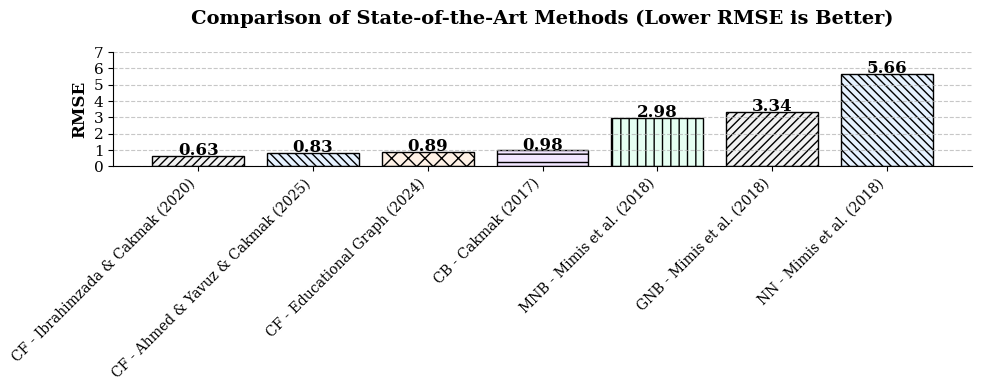

In [94]:
plot_state_of_the_art(nn, nb, cb_2017)